# Challenge

Team:
* Arturo Fornés
* David Arana
* Miguel Montoya
* Gerardo Juárez

In [66]:
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import datetime

In [112]:
constellation = pd.read_csv("constellationBrand.csv")
constellation.head()
constellation = constellation.drop("Semana")
constellation['Categoría: Todas las categorías'] = constellation['Categoría: Todas las categorías'].astype(float)
constellation['Categoría: Todas las categorías'] = (constellation['Categoría: Todas las categorías'] - constellation['Categoría: Todas las categorías'].mean()) / (constellation['Categoría: Todas las categorías'].max() - constellation['Categoría: Todas las categorías'].min())
constellation.tail()


,Categoría: Todas las categorías
2019-01-13,0.472375
2019-01-20,0.062375
2019-01-27,0.522375
2019-02-03,0.062375
2019-02-10,0.052375


In [45]:
love = pd.read_csv("love.csv")
love.head()
love = love.drop("Semana")
love['Categoría: Todas las categorías'] = love['Categoría: Todas las categorías'].astype(float)
love['Categoría: Todas las categorías'] = (love['Categoría: Todas las categorías'] - love['Categoría: Todas las categorías'].mean()) / (love['Categoría: Todas las categorías'].max() - love['Categoría: Todas las categorías'].min())
love.head()

,Categoría: Todas las categorías
2014-02-16,0.167092
2014-02-23,0.028203
2014-03-02,-0.027352
2014-03-09,-0.110685
2014-03-16,-0.055130


In [47]:
vegan = pd.read_csv("vegan.csv")
vegan.head()
vegan = vegan.drop("Semana")
vegan['Categoría: Todas las categorías'] = vegan['Categoría: Todas las categorías'].astype(float)
vegan['Categoría: Todas las categorías'] = (vegan['Categoría: Todas las categorías'] - vegan['Categoría: Todas las categorías'].mean()) / (vegan['Categoría: Todas las categorías'].max() - vegan['Categoría: Todas las categorías'].min())
vegan.head()

,Categoría: Todas las categorías
2014-02-16,-0.315417
2014-02-23,-0.315417
2014-03-02,-0.273164
2014-03-09,-0.315417
2014-03-16,-0.301333


In [48]:
pepsico = pd.read_csv("pepsico.csv")
pepsico.head()
pepsico = pepsico.drop("Semana")
pepsico['Categoría: Todas las categorías'] = pepsico['Categoría: Todas las categorías'].astype(float)
pepsico['Categoría: Todas las categorías'] = (pepsico['Categoría: Todas las categorías'] - pepsico['Categoría: Todas las categorías'].mean()) / (pepsico['Categoría: Todas las categorías'].max() - pepsico['Categoría: Todas las categorías'].min())
pepsico.head()

,Categoría: Todas las categorías
2014-02-16,0.068557
2014-02-23,0.055223
2014-03-02,0.041890
2014-03-09,0.068557
2014-03-16,0.055223


In [49]:
camila = pd.read_csv("camila.csv")
camila.head()
camila = camila.drop("Semana")
camila['Categoría: Todas las categorías'] = camila['Categoría: Todas las categorías'].astype(float)
camila['Categoría: Todas las categorías'] = (camila['Categoría: Todas las categorías'] - camila['Categoría: Todas las categorías'].mean()) / (camila['Categoría: Todas las categorías'].max() - camila['Categoría: Todas las categorías'].min())
camila.head()

,Categoría: Todas las categorías
2014-02-16,-0.184182
2014-02-23,-0.163774
2014-03-02,-0.153569
2014-03-09,-0.173978
2014-03-16,-0.173978


In [59]:
# all_df = pd.DataFrame({"Constellation": constellation, "Love": love, "Vegan": vegan, "Pepsico": pepsico, "Camila": camila})

all_list = {"Constellation": constellation, "Love": love, "Vegan": vegan, "Pepsico": pepsico, "Camila": camila}
all_df = pd.concat(all_list, axis=1)
all_df
all_df.rename(columns={"Categoría: Todas las categorías": ""}, inplace=True)
all_df.head()

,Camila,Constellation,Love,Pepsico,Vegan
,,,,,
2014-02-16,-0.184182,0.202375,0.167092,0.068557,-0.315417
2014-02-23,-0.163774,-0.147625,0.028203,0.055223,-0.315417
2014-03-02,-0.153569,-0.227625,-0.027352,0.041890,-0.273164
2014-03-09,-0.173978,-0.397625,-0.110685,0.068557,-0.315417
2014-03-16,-0.173978,0.102375,-0.055130,0.055223,-0.301333


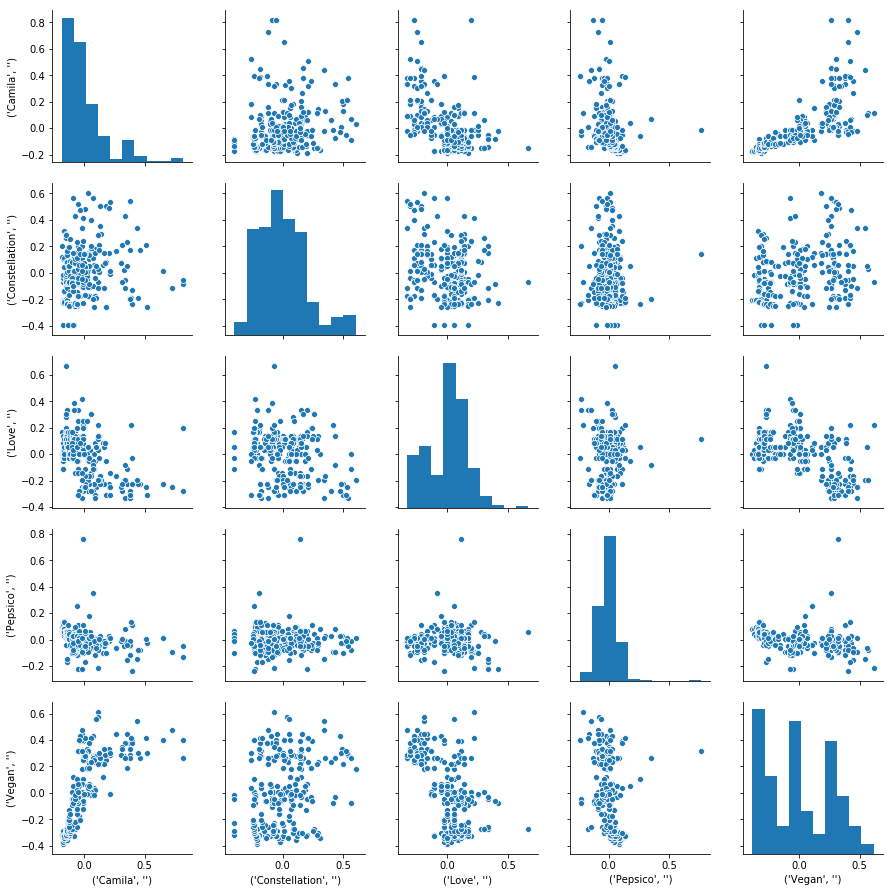

In [60]:
sns.pairplot(all_df)

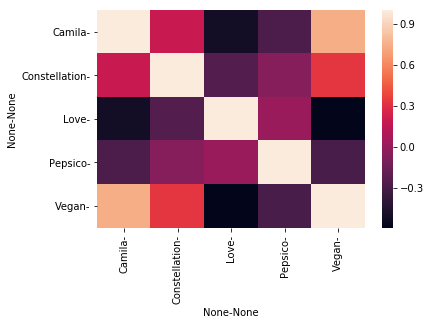

In [61]:
sns.heatmap(all_df.corr())

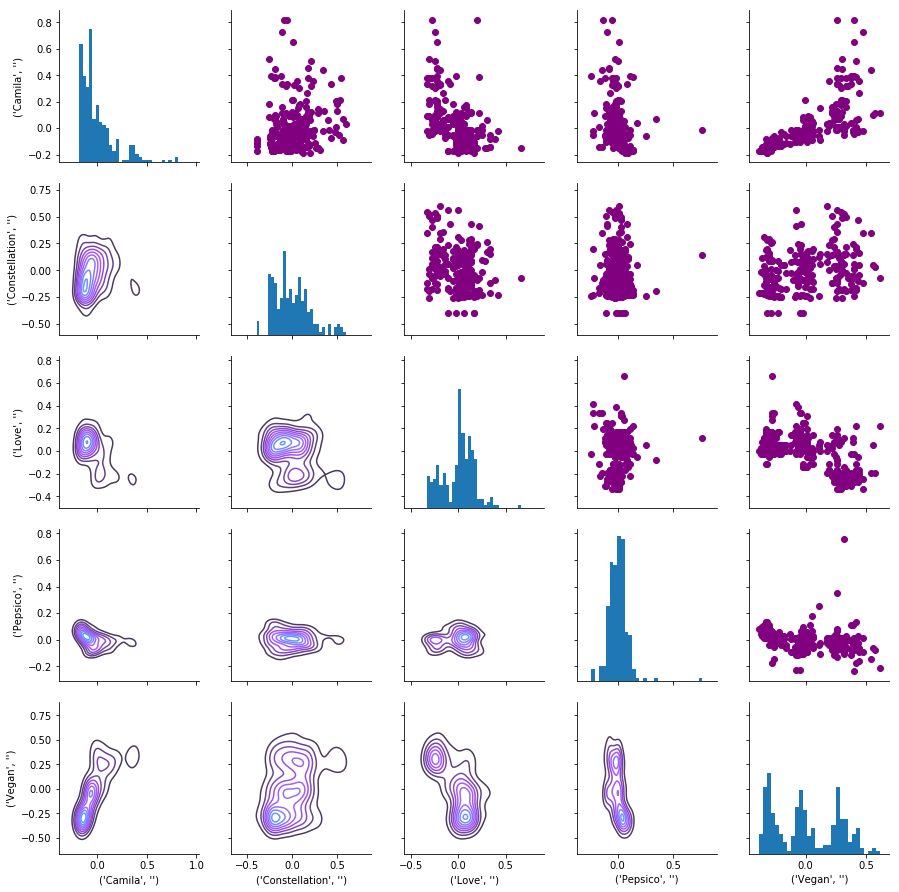

In [62]:
returns_fig = sns.PairGrid(all_df)

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

returns_fig.map_diag(plt.hist, bins=30)

# Conclusión

Según el heatmap de correlación, la mayor correlación es entre el término "vegan" y "camila cabello", esto se confirma al ver los scatter plots y ver que la única relación "diagonal" es entre esos mismos dos términos.

A partir del último plot, hay una correlación inversa entre el término "love" y "vegan", debido a que se aprecia una diagonal con pendiente negativa en el scatter plot y se confirma en el heatmap, viendo que tiene una correlación completamente "oscura".

In [72]:
stocks = pdr.get_data_yahoo(['WEED.TO','ACB.TO','BP','BTI'],start=datetime.datetime(2014,2,16), end= datetime.datetime(2019,2,10))

In [76]:
stocks["Close"].head()

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2014-02-18,NaN,49.410000,52.200001,0.01
2014-02-19,NaN,49.330002,51.860001,0.01
2014-02-20,NaN,49.860001,52.465000,0.01
2014-02-21,NaN,49.810001,52.279999,0.01
2014-02-24,NaN,50.270000,52.755001,0.01


In [75]:
stocks["Close"].tail()

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2019-02-05,10.34,42.820000,35.980000,63.759998
2019-02-06,9.98,43.040001,35.470001,61.380001
2019-02-07,10.30,42.700001,35.470001,62.349998
2019-02-08,9.95,42.490002,35.150002,60.230000
2019-02-11,9.50,42.209999,35.410000,57.180000


In [85]:
stocks["Close"].index

DatetimeIndex(['2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-24', '2014-02-25', '2014-02-26', '2014-02-27',
               '2014-02-28', '2014-03-03',
               ...
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-11'],
              dtype='datetime64[ns]', name='Date', length=1276, freq=None)

In [118]:
week_stocks = stocks["Close"].groupby([pd.Grouper(freq='W-SUN')]).sum().reset_index().sort_values('Date')
week_stocks["Date"] = week_stocks["Date"].astype(str)
week_stocks = week_stocks.set_index("Date")

In [119]:
week_stocks.head()

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2014-02-23,0.0,198.410004,208.805000,0.04
2014-03-02,0.0,252.379997,266.510002,0.05
2014-03-09,0.0,244.380001,275.264999,0.05
2014-03-16,0.0,240.149998,270.725002,0.05
2014-03-23,0.0,235.570000,266.665001,0.05


In [120]:
week_stocks.tail()

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2019-01-20,45.21,201.669998,162.230000,281.800003
2019-01-27,42.66,160.420002,127.669998,296.970001
2019-02-03,46.58,202.899998,170.619999,321.170002
2019-02-10,51.12,212.440002,177.240002,313.020000
2019-02-17,9.50,42.209999,35.410000,57.180000


In [124]:
stocks_search = pd.concat([all_df, week_stocks], axis=1, sort="False")

In [125]:
stocks_search.head()

,"(Camila, )","(Constellation, )","(Love, )","(Pepsico, )","(Vegan, )",ACB.TO,BP,BTI,WEED.TO
2014-02-16,-0.184182,0.202375,0.167092,0.068557,-0.315417,NaN,NaN,NaN,NaN
2014-02-23,-0.163774,-0.147625,0.028203,0.055223,-0.315417,0.0,198.410004,208.805000,0.04
2014-03-02,-0.153569,-0.227625,-0.027352,0.041890,-0.273164,0.0,252.379997,266.510002,0.05
2014-03-09,-0.173978,-0.397625,-0.110685,0.068557,-0.315417,0.0,244.380001,275.264999,0.05
2014-03-16,-0.173978,0.102375,-0.055130,0.055223,-0.301333,0.0,240.149998,270.725002,0.05


In [126]:
stocks_search.tail()

,"(Camila, )","(Constellation, )","(Love, )","(Pepsico, )","(Vegan, )",ACB.TO,BP,BTI,WEED.TO
2019-01-20,-0.041325,0.062375,-0.277352,0.015223,0.402892,45.21,201.669998,162.230000,281.800003
2019-01-27,-0.051529,0.522375,-0.305130,-0.011443,0.318385,42.66,160.420002,127.669998,296.970001
2019-02-03,-0.020916,0.062375,-0.138463,0.015223,0.318385,46.58,202.899998,170.619999,321.170002
2019-02-10,0.101533,0.052375,0.055981,-0.064777,0.557822,51.12,212.440002,177.240002,313.020000
2019-02-17,NaN,NaN,NaN,NaN,NaN,9.50,42.209999,35.410000,57.180000


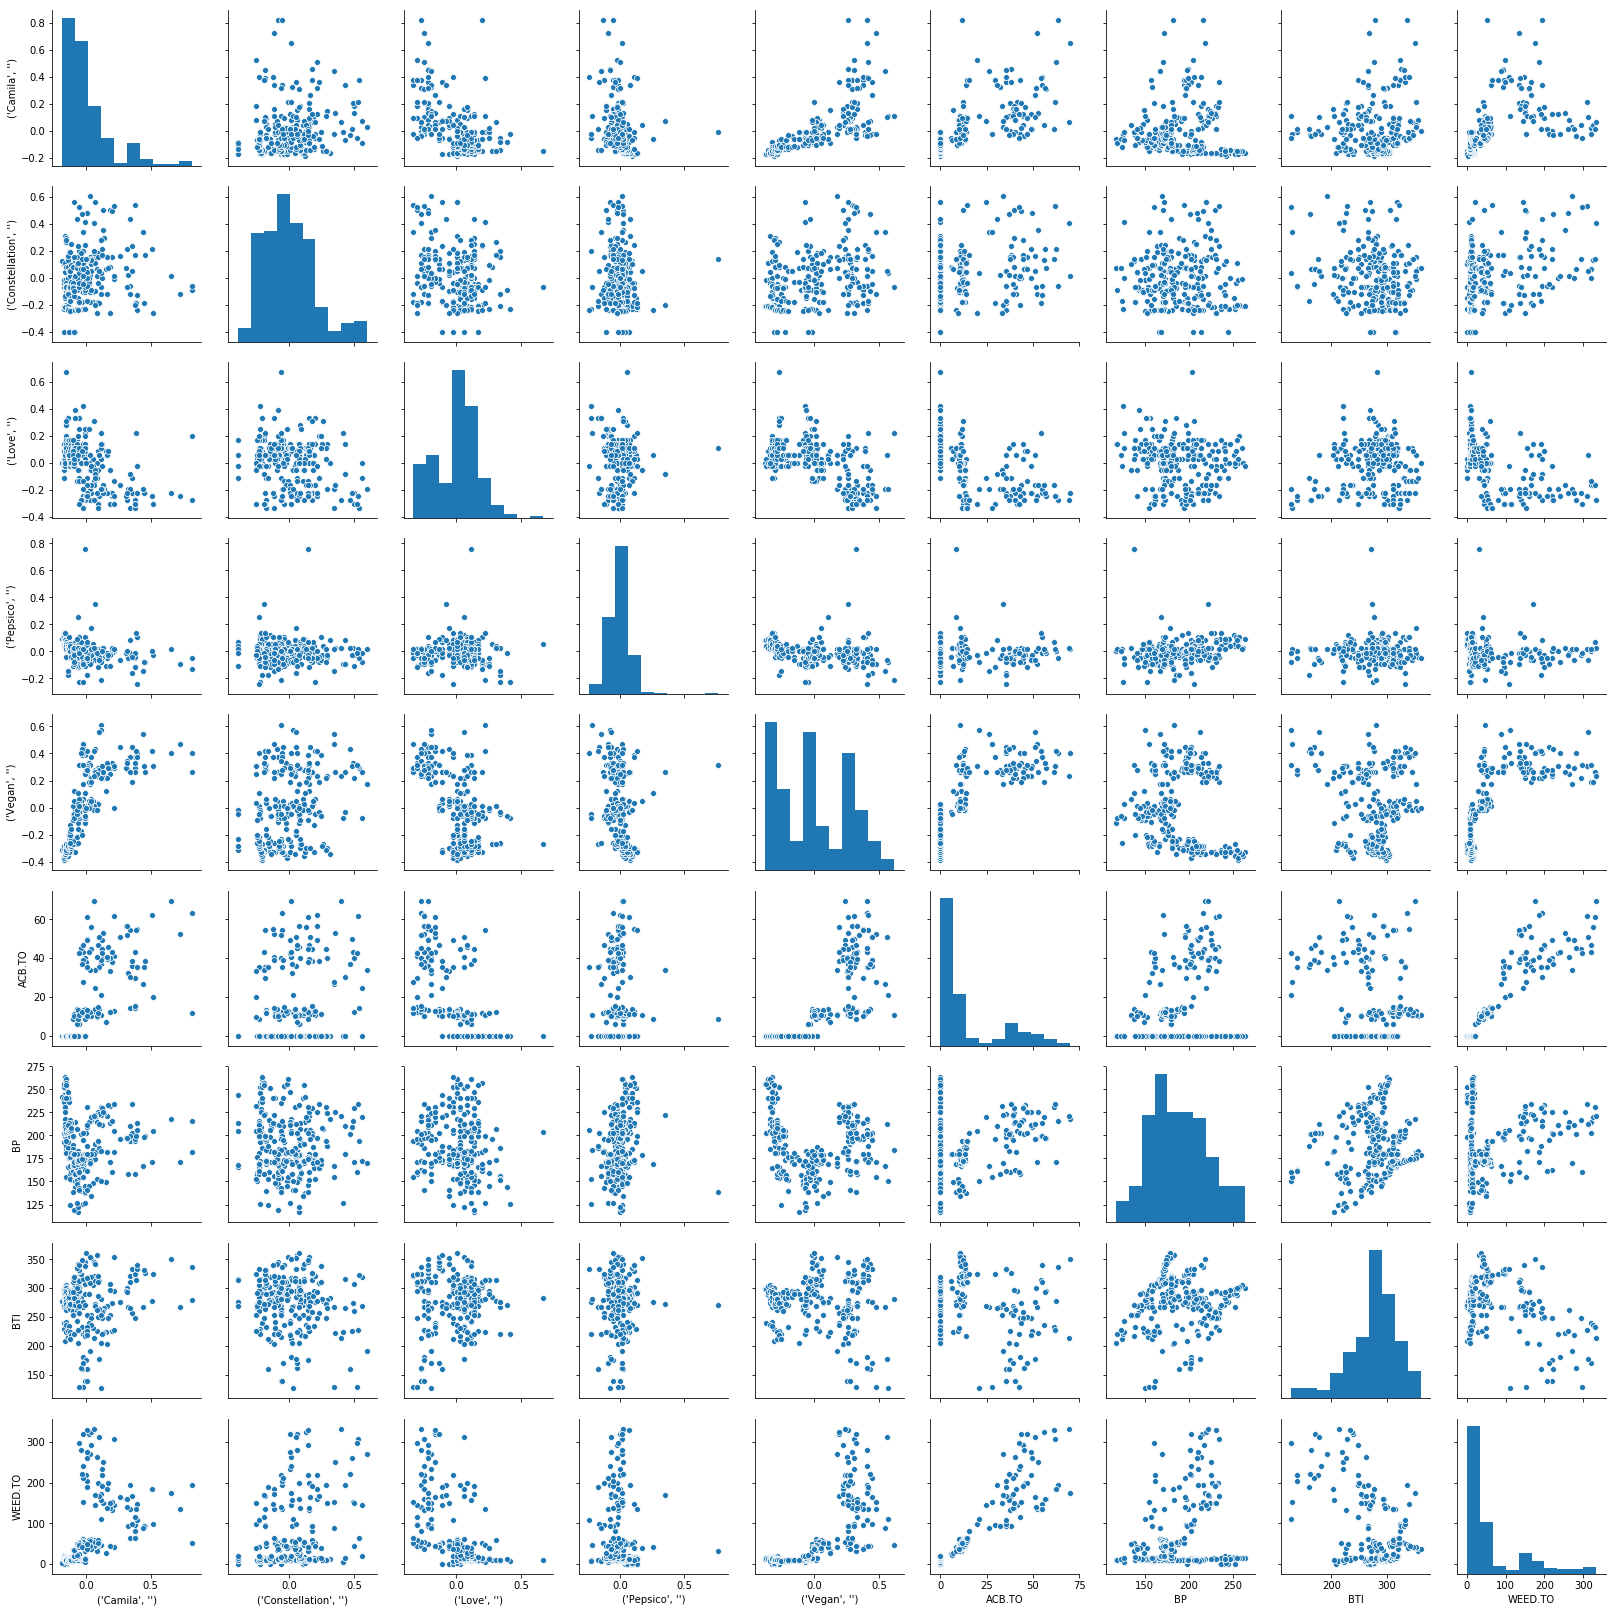

In [128]:
sns.pairplot(stocks_search.dropna())

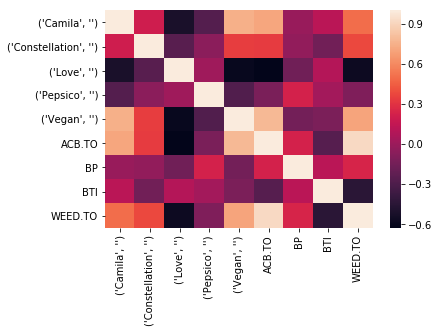

In [129]:
sns.heatmap(stocks_search.dropna().corr())

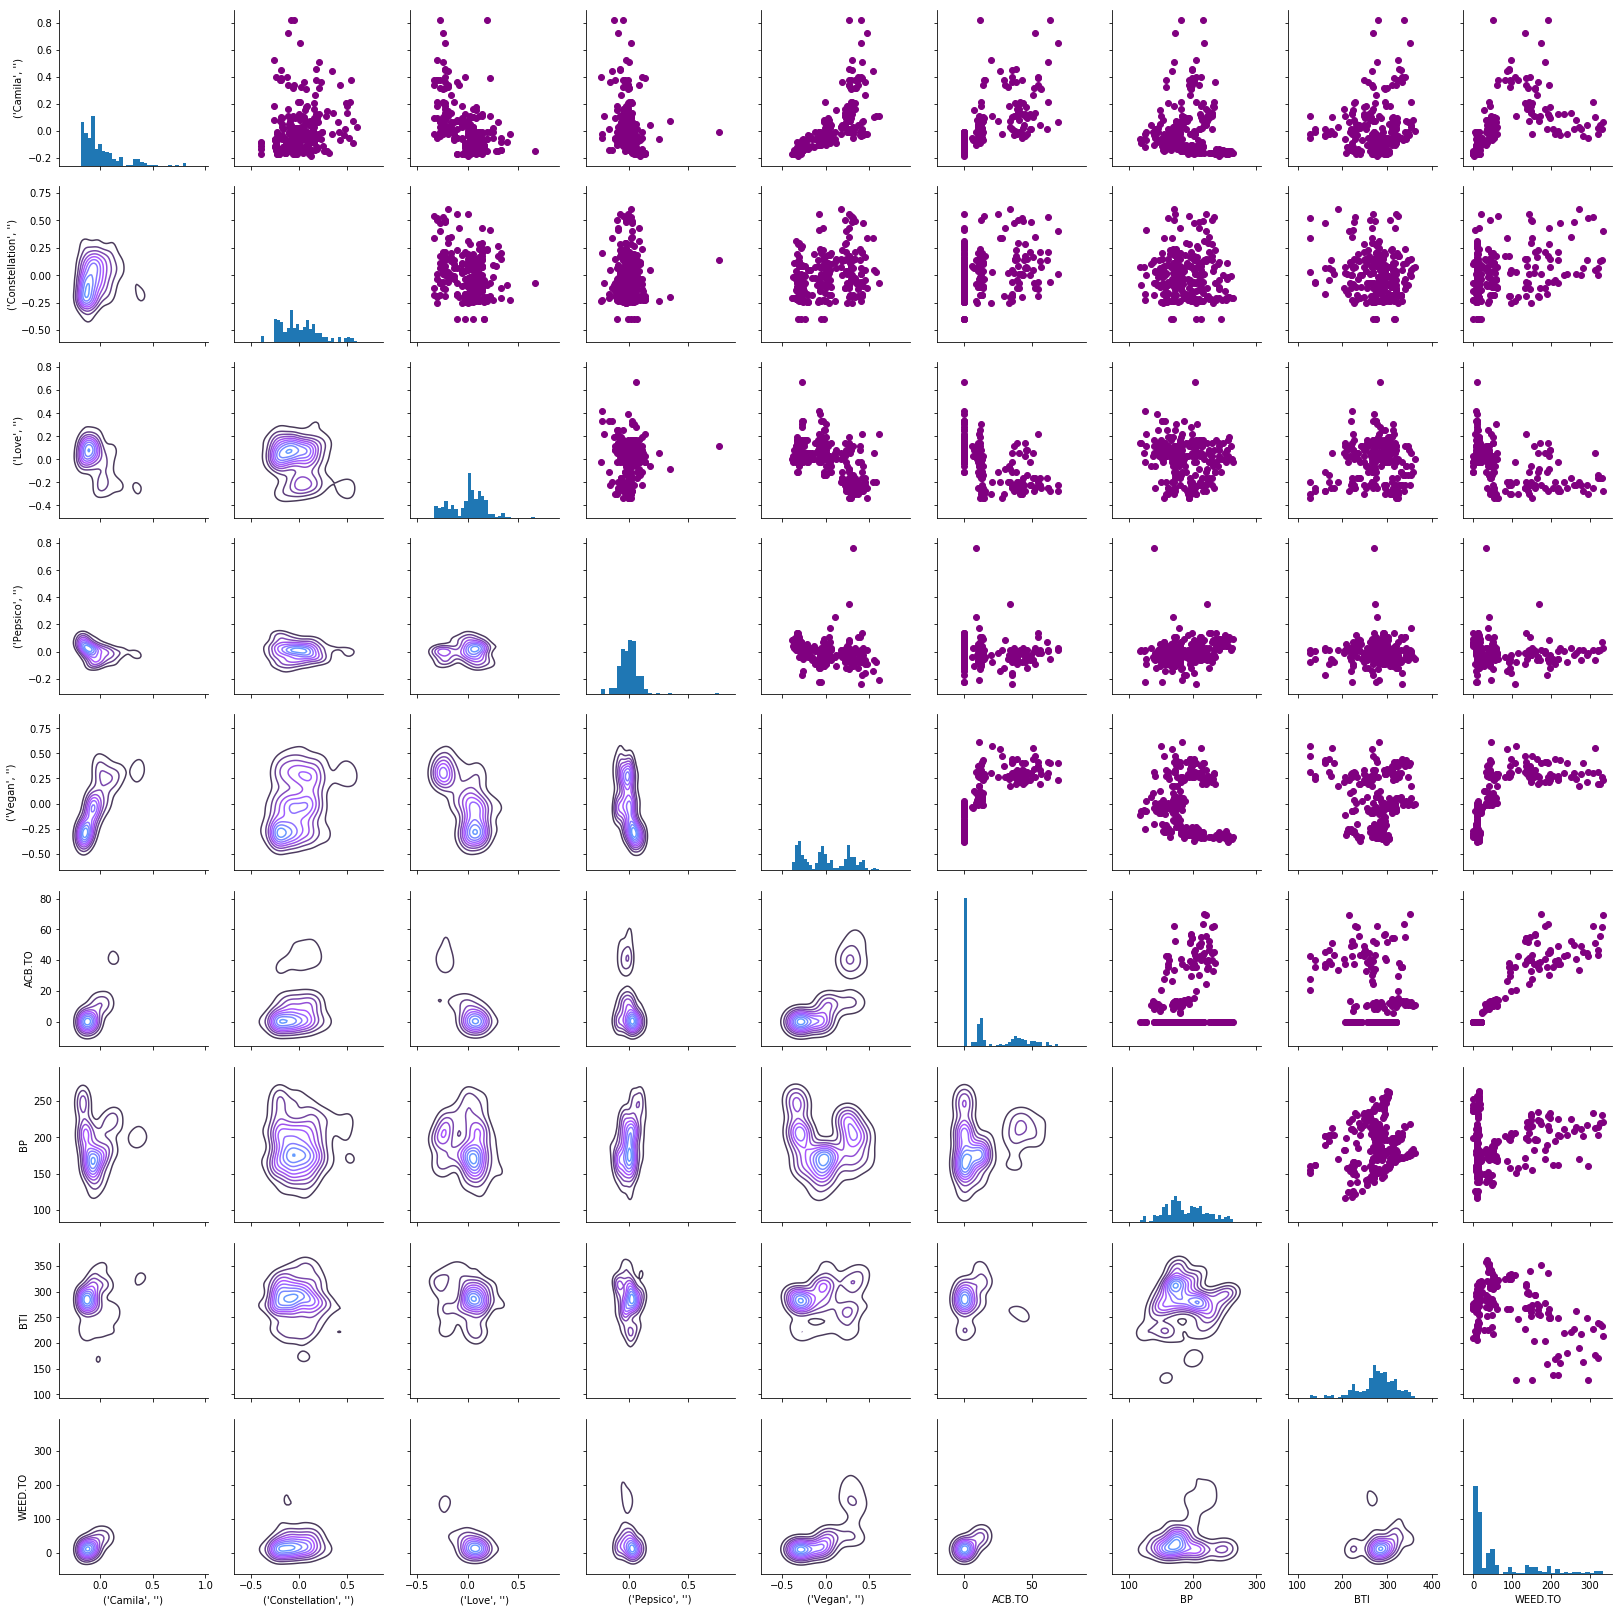

In [131]:
returns_fig = sns.PairGrid(stocks_search.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

returns_fig.map_diag(plt.hist, bins=30)

# Conclusión todo junto

Los mariguanos escuchan camila cabello y son veganos, esto se evidencia viendo la relación entre WEED.TO y ACB.TO y los términos de búsqueda "vegan" y "camila cabello".